# 関数定義

In [22]:
def ndsolve(fs, x0, t0, tend, dt = 0.01):
    #fs:関数のリスト，x0:初期値，t0:初期時間，tend:終時間，dt:刻み幅
    dim = len(fs)
    
    xnext = [0 for i in range(dim)]
    x = x0[:]
    traj = [[t0, *x0]]
    t = t0
    
    while t < tend:
        xnext = list(map(lambda _x, _f: _x + _f(*x) * dt, x, fs))
        # ここは x + f(x)*dt をmapで一気に計算している
        t += dt
        traj.append([t, *xnext])
        x = xnext
    
    return traj

# FitzHugh-Nagumo

In [23]:
fs = [lambda x,y: x - x**3 - y, lambda x,y: x ]
traj = ndsolve(fs, [2,1], 0, 30)
ttr, xtr, ytr = zip(*traj)

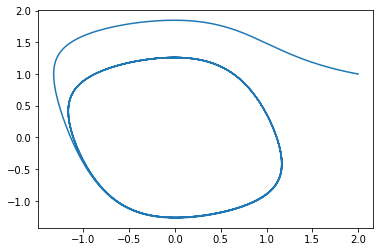

In [24]:
import matplotlib.pyplot as plt
ttr, xtr, ytr = zip(*traj)
plt.plot(xtr, ytr)
plt.show()

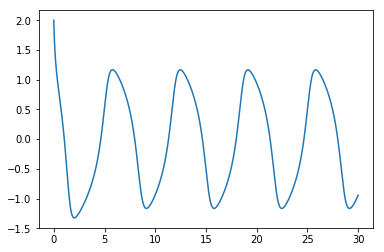

In [25]:
plt.plot(ttr, xtr)
plt.show()

# Rössler chaos

In [26]:
c1 = 0.15
c2 = 0.2
c3 = 7.1
fs = [lambda x,y,z: -y - z, lambda x,y,z: x + c1*y, lambda x,y,z: c2 + z * (x - c3) ]
traj = ndsolve(fs, [1,1,1], 0, 1000)
ttr, xtr, ytr, ztr = zip(*traj)

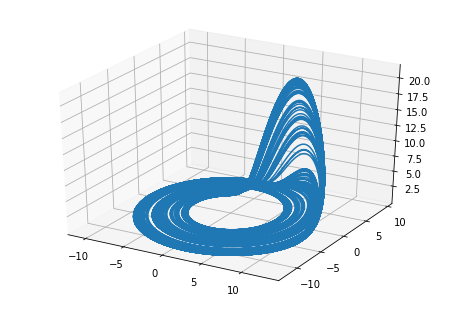

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(xtr[10000:], ytr[10000:], ztr[10000:]) # 最初の方は捨てる
plt.show()